In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

from synexp_multioutcome import *
from viz import *

### Experimental setup:
- $X \in [-1,1]$
- $\eta^*_d(x)$ sinusoidal function
- $\pi(x)$ linear and correlated with $\eta^*_0(x)$


## Experiments

#### Primary: model comparision
- $\hat{P}[Y=1|X=x]$ (naive observational)
- $\hat{P}_{\ell}[Y=1|D=d,X=x]$ (conditional outcome)
- $\hat{P}_{\tilde{\ell}}[Y=1|D=d,X=x]$ (**ours:** conditional outcome with surrogate loss)
- $\hat{P}[Y_d=1|X=x]$ (proxy PO oracle)
- $\hat{P}[Y^*_d=1|X=x]$ (target PO oracle)

#### Primary: Parameter estimation experiment (test of CCPE approach)
- Compare bias in parameter estimates as a function of sample size $Ns = [1k, 2k, ..., 20k]$
- Show that non-random decisions (non-uniform $\pi$) introduces more bias in $\alpha$ or $\beta$

#### Primary: robustness to parameter estimation error
- Evaluate how conditional outcome model performance deteriorates as a function of parameter estimation error
- Vary magnitude of error terms

#### Appendix: Conditional outcome model performance as a function of measurement error
- Vary measurement error parameters and see how optimizing "naive" loss performs






In [3]:
Y0_PDF = 'sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'

# Example code invoking experiemnt setup functions
expdf, error_params = generate_syn_data(
    NS=5000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.05,
    error_max=0.25
)
# Sanity check
# results, val_scores = run_baseline_comparison_exp(expdf, do=0,
#                                            error_params=error_params, n_epochs=20, train_ratio=.7)

## Main Experiment: Validating factual surrogate loss correction

In [3]:
do=0
baselines = [{
    'model': 'Observational',
    'target': 'Y0'
},{
    'model': 'Conditional outcome',
    'target': 'Y0'
},{
    'model': 'Conditional outcome (SL)',
    'target': 'Y0'
},{
    'model': 'Proxy PO Oracle',
    'target': f'Y0_{do}'
},{
    'model': 'Target PO Oracle',
    'target': f'YS_{do}'
}]

exp_results = run_baseline_comparison_exp(baselines, do=do,
                                          N_RUNS=10, NS=10000, K=1, n_epochs=40)
resultdf = pd.DataFrame(exp_results)

Target: Y0: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:31<00:00,  1.25it/s]


Target: YS_0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:30<00:00,  1.31it/s]


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Observational'),
  Text(1, 0, 'Conditional outcome'),
  Text(2, 0, 'Conditional outcome (SL)'),
  Text(3, 0, 'Proxy PO Oracle'),
  Text(4, 0, 'Target PO Oracle')])

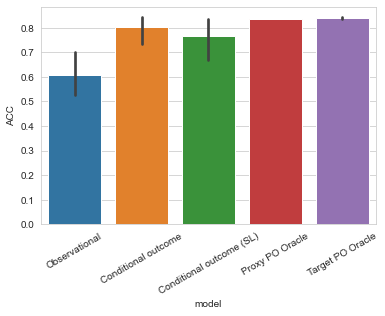

In [4]:
sns.barplot(data=resultdf, x='model', y='ACC')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Observational'),
  Text(1, 0, 'Conditional outcome'),
  Text(2, 0, 'Conditional outcome (SL)'),
  Text(3, 0, 'Proxy PO Oracle'),
  Text(4, 0, 'Target PO Oracle')])

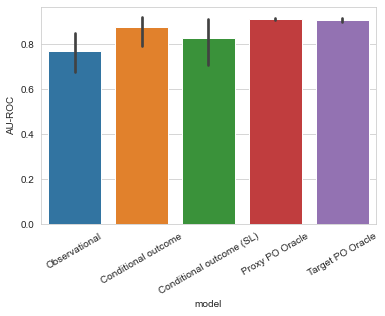

In [5]:
sns.barplot(data=resultdf, x='model', y='AU-ROC')
plt.xticks(rotation=30)

## Main Experiment: parameter estimation via CCPE

In [ ]:
SAMPLE_SIZES = [1000, 5000, 10000, 20000]
exp_results, py_results = ccpe_benchmark_exp(SAMPLE_SIZES, N_RUNS=5, K=3, n_epochs=20)

[Text(0.5, 21.200000000000003, 'Samples'),
 Text(21.200000000000003, 0.5, 'Estimation error'),
 Text(0.5, 1.0, 'Parameter estimation error as a function of sample size')]

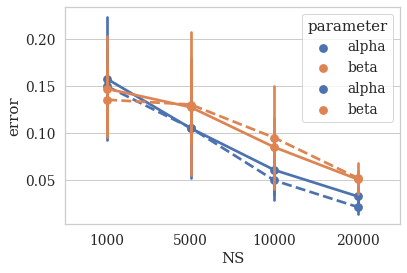

In [60]:
result_df = get_ccpe_result_df(do=1, exp_results=exp_results)
proxy = result_df[result_df['aggregate'] == False]
agg = result_df[result_df['aggregate'] == True]

# sns.pointplot(data=proxy, x='NS', y='error', hue='parameter')
sns.pointplot(data=agg, x='NS', y='error', hue='parameter', linestyles='--', capsize=.4)
sns.pointplot(data=proxy, x='NS', y='error', hue='parameter', capsize=.4)

ax.set(xlabel='Samples', ylabel='Bias of estimate', title='Parameter estimation error as a function of sample size')

#TODO: 
# - Correctly label alpha, beta parameters


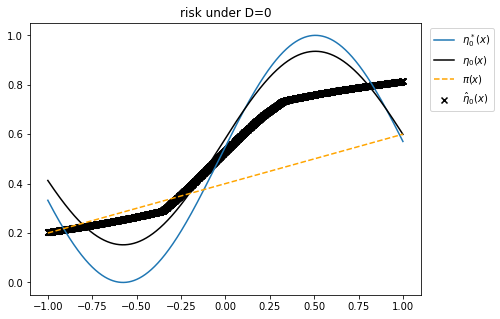

In [114]:
# Possibly create a helper function here for plotting resuls of experiments

params = { 'alpha': None, 'alpha_0': 0.15228761, 'beta': None, 'beta_0': 0.06452641 }

do=0
debug_info = {
    'val_x': py_results[8000][0][0][0]['x'],
    'val_py': py_results[8000][0]['eta_0_bar']
}
expdf, error_params = generate_syn_data(
    NS=5000,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.05,
    error_max=0.25
)

viz_ccpe_estimates(expdf, debug_info, params, do, Y0_PDF, Y1_PDF, PI_PDF)


## Secondary Experiment: Robustness to Estimation Error

In [10]:
expdf, error_params = generate_syn_data(
    NS,
    K,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.05,
    error_max=0.25
)

In [12]:
total_errors = [.01, .05, .1, .2]
error_params

{'alpha_0': array([0.12411987, 0.15362245, 0.06159726]),
 'alpha_1': array([0.13284488, 0.21156104, 0.20790816]),
 'beta_0': array([0.18943476, 0.11568019, 0.0976839 ]),
 'beta_1': array([0.19275792, 0.08645384, 0.08615694])}

In [16]:

expdf, error_params = generate_syn_data(
    NS=NS,
    K=1,
    y0_pdf=Y0_PDF,
    y1_pdf=Y1_PDF,
    pi_pdf=PI_PDF,
    error_min=0.05,
    error_max=0.25
)

In [ ]:
def get_noisy_params(true_params, do, eps):
    
    alpha_true = error_params[f'alpha_{do}']
    beta_true = error_params[f'beta_{do}']
    
    
    random.sample([-1, 1], 1)[0] * eps
    

In [ ]:
        surrogate_params = {
            'alpha': 
            'beta': 
        }

In [13]:
Y0_PDF = 'sinusoid'
Y1_PDF = 'low_base_rate_sinusoid'
PI_PDF = 'linear'


baseline = {
    'model': 'Conditional outcome (SL)',
    'target': 'Y0'
}
        
exp_results = {
    'model': [],
    'AU-ROC': [],
    'ACC': []
}



for config in param_configs:
    
    for RUN in range(N_RUNS):
        expdf, error_params = generate_syn_data(
            NS,
            K,
            y0_pdf=Y0_PDF,
            y1_pdf=Y1_PDF,
            pi_pdf=PI_PDF,
            error_min=0.05,
            error_max=0.25
        )
        
        target = baseline['target']

        run_baseline(expdf, baseline, do, surrogate_params, n_epochs=5, train_ratio=.7):


IndentationError: unexpected indent (2810195594.py, line 54)

In [ ]:
def run_estimation_error_exp(expdf, do, error_params, n_epochs=5, train_ratio=.7):

    expdf = expdf.sample(frac=1).reset_index(drop=True)
    split_ix = int(expdf.shape[0]*train_ratio)
    train_df, val_df = expdf.iloc[:split_ix,:], expdf.iloc[split_ix:,:]
    
    exp_results = {
        'noise_rate': [],
        'AU-ROC': []
    }


    
    targets = ['YD']
    val_scores = {}
    
    for surrogate_params in param_configs:
        
        train_loader, val_loader = get_loaders(train_df, val_df, do, target)
        model = MLP()
        losses = train(model, train_loader, error_params=surrogate_params, n_epochs=n_epochs)
        x, y, py_hat = evaluate(model, val_loader)
        auroc = roc_auc_score(y, py_hat)

        exp_results['noise_rate'].append(surrogate_params['alpha']+surrogate_params['beta'])
        exp_results['AU-ROC'].append(auroc)
        
        val_scores[target] = {}
        val_scores[target]['x'] = x
        val_scores[target]['y'] = y
        val_scores[target]['py_hat'] = py_hat

    return exp_results, val_scores

run_estimation_error_exp(expdf, do, error_params,
                         n_epochs=5, train_ratio=.7)

sns.barplot(data=resultdf, x='model', y='AU-ROC')

## Visualize class probability estimates

Target: YS_0: 100%|█████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]


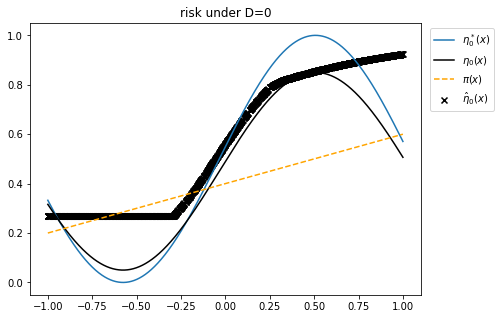

In [19]:
params = { 'alpha': None, 'alpha_0': .05, 'beta': None, 'beta_0': .15 }
baseline = {
    'model': 'Target PO Oracle',
    'target': 'YS_0'
    
}

results = run_baseline(expdf, baseline, do, params,
             n_epochs=10, train_ratio=.7)

do=0
debug_info = {
    'val_x': results['x'],
    'val_py': results['py_hat']
}

viz_ccpe_estimates(expdf, debug_info, params, do, Y0_PDF, Y1_PDF, PI_PDF)
